# Sentiment Analysis

In [ ]:
import random
hotelname = df['Hotel_Name'].unique()
random.seed(42)  # Set the random seed for reproducibility
random_hotel_names = random.sample(list(hotelname), 30)  # Randomly pick 30 hotel names

subset = df[df['Hotel_Name'].isin(random_hotel_names)]  # Filter rows based on the selected hotel names
subset.to_csv('subset.csv', index=False)  # Save the subset to a CSV file

In [ ]:
df = subset.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9536 entries, 22321 to 500567
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               9536 non-null   object 
 1   Additional_Number_of_Scoring                9536 non-null   int64  
 2   Review_Date                                 9536 non-null   object 
 3   Average_Score                               9536 non-null   float64
 4   Hotel_Name                                  9536 non-null   object 
 5   Reviewer_Nationality                        9536 non-null   object 
 6   Negative_Review                             9536 non-null   object 
 7   Review_Total_Negative_Word_Counts           9536 non-null   int64  
 8   Total_Number_of_Reviews                     9536 non-null   int64  
 9   Positive_Review                             9536 non-null   object 
 10  Review

In [ ]:
df_pos = df.drop(['Negative_Review', 'Review_Total_Negative_Word_Counts'], axis=1)
df_neg = df.drop(['Positive_Review', 'Review_Total_Positive_Word_Counts'], axis=1)

In [ ]:
df_neg['label'] = 0
df_pos['label'] = 1


df_pos.rename(columns={'Positive_Review': 'Reviews', 'Review_Total_Positive_Word_Counts': 'WordCounts'}, inplace=True)
df_neg.rename(columns={'Negative_Review': 'Reviews', 'Review_Total_Negative_Word_Counts': 'WordCounts'}, inplace=True)


In [ ]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9536 entries, 22321 to 500567
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               9536 non-null   object 
 1   Additional_Number_of_Scoring                9536 non-null   int64  
 2   Review_Date                                 9536 non-null   object 
 3   Average_Score                               9536 non-null   float64
 4   Hotel_Name                                  9536 non-null   object 
 5   Reviewer_Nationality                        9536 non-null   object 
 6   Total_Number_of_Reviews                     9536 non-null   int64  
 7   Reviews                                     9536 non-null   object 
 8   WordCounts                                  9536 non-null   int64  
 9   Total_Number_of_Reviews_Reviewer_Has_Given  9536 non-null   int64  
 10  Review

In [ ]:
merged_df = pd.concat([df_pos, df_neg], ignore_index=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19072 entries, 0 to 19071
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               19072 non-null  object 
 1   Additional_Number_of_Scoring                19072 non-null  int64  
 2   Review_Date                                 19072 non-null  object 
 3   Average_Score                               19072 non-null  float64
 4   Hotel_Name                                  19072 non-null  object 
 5   Reviewer_Nationality                        19072 non-null  object 
 6   Total_Number_of_Reviews                     19072 non-null  int64  
 7   Reviews                                     19072 non-null  object 
 8   WordCounts                                  19072 non-null  int64  
 9   Total_Number_of_Reviews_Reviewer_Has_Given  19072 non-null  int64  
 10  Reviewer_S

In [ ]:
df = merged_df.copy()

### Text Blob Sentiment Analysis

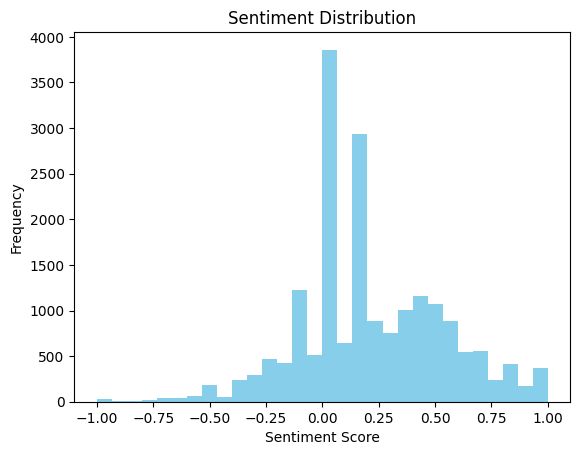

In [ ]:
# Testing it with Text blob , a simple text analyser; source : https://textblob.readthedocs.io/en/dev/
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment_Score'] = df['Reviews'].apply(get_sentiment)


plt.hist(df['Sentiment_Score'], bins=30, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

## Sentiment Analysis Pre Processing

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import gensim.downloader as api
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.metrics import confusion_matrix

In [ ]:
# Preprocessing
df["Reviews_Processed"] = df["Reviews"].str.lower()
df["Reviews_Processed"] = df["Reviews_Processed"].replace('<br />', ' ', regex=True)
df["Reviews_Processed"] = df["Reviews_Processed"].replace('[^\w\d\s]', ' ', regex=True)

In [ ]:
# Tokenization and removing stop words
nltk.download('stopwords')
nltk.download('punkt')
tokenized_reviews = [word_tokenize(review) for review in df["Reviews_Processed"]]
stop_words = set(stopwords.words('english'))
for indx, tokens in enumerate(tokenized_reviews):
    tokenized_reviews[indx] = [word for word in tokens if word not in stop_words]
df["Reviews_Tokenized"] = tokenized_reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Using Glove API for Sentiment Analysis

In [ ]:
#Vectorize

import gensim.downloader as api
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Either build your own model (pros and cons?)
# model_word2vec = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=2) # negative=50 , epochs=50, vector_size=300
# model_word2vec = model_word2vec.wv

# Or load a pre-trained model (pros and cons?)
# Load the Google News Word2Vec model
model_word2vec = api.load('glove-wiki-gigaword-50') # glove-wiki-gigaword-50 #word2vec-google-news-300

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
#Getting word embeddings

import nltk
nltk.download('punkt')

def get_word_embedding(word, model):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)


embeddings = []
for review in tokenized_reviews:
  review_embeddings = [get_word_embedding(word, model_word2vec) for word in review ]
  review_embedding = np.mean(review_embeddings if len(review_embeddings) >0 else [np.zeros(model_word2vec.vector_size)], axis=0)
  embeddings = embeddings + [review_embedding]

embeddings = np.array(embeddings)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
embeddings

array([[ 0.19063897,  0.40833554, -0.03258369, ..., -0.24863581,
         0.09741729,  0.09792292],
       [ 0.32072499,  0.63059497, -0.54146045, ..., -1.29784501,
         0.1333355 ,  0.0788225 ],
       [ 0.34379512,  0.24192742, -0.13802126, ..., -0.4032315 ,
         0.17057684,  0.10039941],
       ...,
       [ 0.34784001,  0.037246  , -0.26159   , ...,  0.38308001,
         0.079273  ,  0.48636001],
       [ 0.31524837,  0.08734637,  0.11073937, ..., -0.36514625,
        -0.09880862,  0.22844376],
       [-0.033329  , -0.08402   ,  0.29251999, ...,  1.0697    ,
         1.02649999,  0.59463   ]])

## Sentiment Analysis Models : Supervised Approach

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(embeddings, df['label'], test_size=0.2, random_state=42)

# train the model
model_word2vec_classification = LogisticRegression()
model_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred = model_word2vec_classification.predict(X_test)

# Evaluate the model
f1_score = sklearn.metrics.f1_score(y_test, y_pred)
print(f"f1_score: {f1_score}")
print(sklearn.metrics.classification_report(y_test,y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=model_word2vec_classification.classes_, index=model_word2vec_classification.classes_ )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


f1_score: 0.8861219195849546
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1900
           1       0.88      0.89      0.89      1915

    accuracy                           0.88      3815
   macro avg       0.89      0.88      0.88      3815
weighted avg       0.88      0.88      0.88      3815



,0,1
0,0.877895,0.122105
1,0.108094,0.891906


In [ ]:
# Evaluate performance using accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.8849279161205766
Precision: 0.8804123711340206
Recall: 0.8919060052219321
F1-score: 0.8861219195849546


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


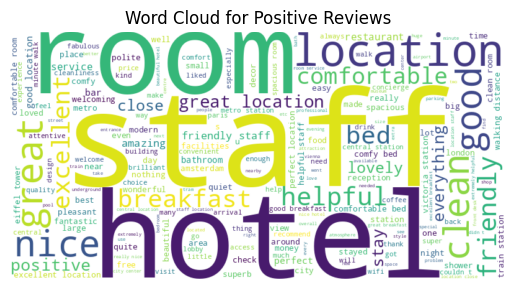

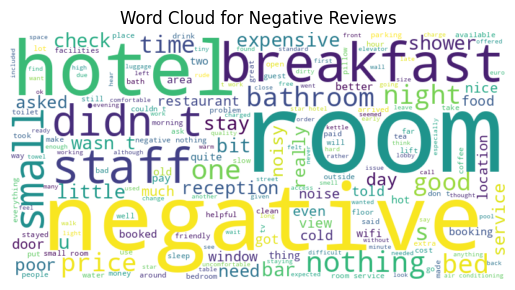

In [ ]:
# Create word clouds for positive and negative reviews
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_reviews = df[df['label'] == 1]['Reviews_Processed'].str.cat(sep=' ')
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Generate word cloud for negative reviews
negative_reviews = df[df['label'] == 0]['Reviews_Processed'].str.cat(sep=' ')
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


### Building own model using Word2Vec

In [ ]:
#Vectorize

import gensim.downloader as api
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Either build your own model (pros and cons?)
model_word2vec = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=2) # negative=50 , epochs=50, vector_size=300
model_word2vec = model_word2vec.wv

# Or load a pre-trained model (pros and cons?)
# Load the Google News Word2Vec model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Getting word embeddings

import nltk
nltk.download('punkt')

def get_word_embedding(word, model):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)


embeddings = []
for review in tokenized_reviews:
  review_embeddings = [get_word_embedding(word, model_word2vec) for word in review ]
  review_embedding = np.mean(review_embeddings if len(review_embeddings) >0 else [np.zeros(model_word2vec.vector_size)], axis=0)
  embeddings = embeddings + [review_embedding]

embeddings = np.array(embeddings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(embeddings, df['label'], test_size=0.2, random_state=42)

# train the model
model_word2vec_classification = LogisticRegression()
model_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred2 = model_word2vec_classification.predict(X_test)

# Evaluate the model
f1_score = sklearn.metrics.f1_score(y_test, y_pred2)
print(f"f1_score: {f1_score}")
print(sklearn.metrics.classification_report(y_test,y_pred2))
pd.DataFrame(confusion_matrix(y_test, y_pred2, normalize='true'), columns=model_word2vec_classification.classes_, index=model_word2vec_classification.classes_ )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


f1_score: 0.8258567846196712
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1900
           1       0.89      0.77      0.83      1915

    accuracy                           0.84      3815
   macro avg       0.84      0.84      0.84      3815
weighted avg       0.84      0.84      0.84      3815



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0,1
0,0.898947,0.101053
1,0.226110,0.773890


In [ ]:
# Evaluate performance using accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.836173001310616
Precision: 0.8853046594982079
Recall: 0.7738903394255875
F1-score: 0.8258567846196712


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


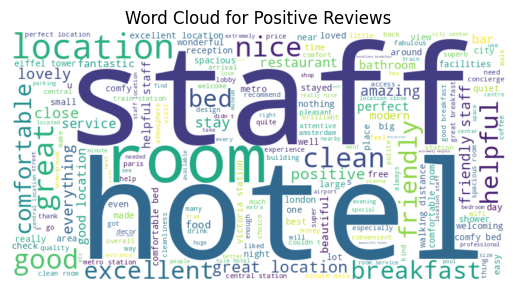

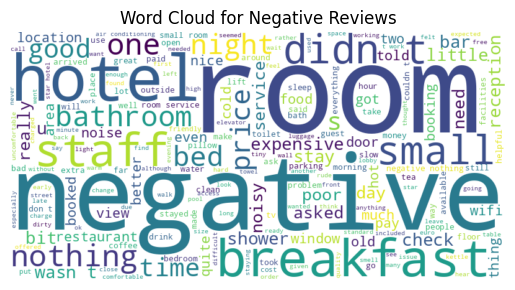

In [ ]:
# Create word clouds for positive and negative reviews
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_reviews = df[df['label'] == 1]['Reviews_Processed'].str.cat(sep=' ')
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Generate word cloud for negative reviews
negative_reviews = df[df['label'] == 0]['Reviews_Processed'].str.cat(sep=' ')
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


## Unsupervised approach

In [ ]:
df = merged_df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim.downloader as api

# Load pre-trained word embedding model (Word2Vec)
model_word2vec = api.load('glove-wiki-gigaword-50')

#positive and negative seed words
ideal_pos = ['good', 'great', 'excellent', 'awesome', 'fantastic']
ideal_neg = ['bad', 'poor', 'terrible', 'horrible', 'awful']

# Compute sentiment scores for each review
def compute_sentiment_score(review_tokens):
    if not review_tokens:
        return 0.0  # Return neutral sentiment if review is empty
    positive_similarity = model_word2vec.n_similarity(ideal_pos, review_tokens)
    negative_similarity = model_word2vec.n_similarity(ideal_neg, review_tokens)
    sentiment_score = positive_similarity - negative_similarity
    return sentiment_score

# Assign sentiment labels based on sentiment scores
def assign_sentiment_label(sentiment_score):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Compute sentiment scores and assign sentiment labels for each review
df['Sentiment_Score'] = df['Reviews_Tokenized'].apply(compute_sentiment_score)
df['Sentiment'] = df['Sentiment_Score'].apply(assign_sentiment_label)

# Optionally, evaluate performance
# (Note: Ground truth labels are required for evaluation)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

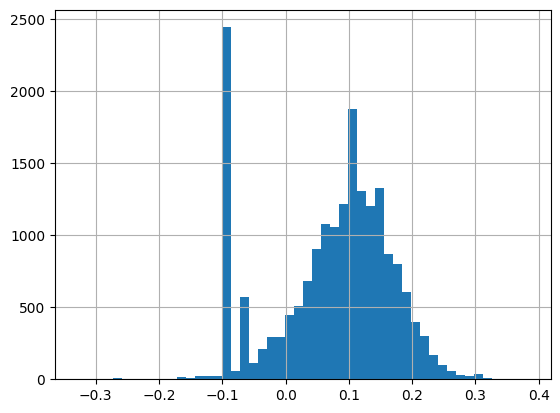

In [ ]:
df['Sentiment_Score'].hist(bins=50)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19072 entries, 0 to 19071
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               19072 non-null  object 
 1   Additional_Number_of_Scoring                19072 non-null  int64  
 2   Review_Date                                 19072 non-null  object 
 3   Average_Score                               19072 non-null  float64
 4   Hotel_Name                                  19072 non-null  object 
 5   Reviewer_Nationality                        19072 non-null  object 
 6   Total_Number_of_Reviews                     19072 non-null  int64  
 7   Reviews                                     19072 non-null  object 
 8   WordCounts                                  19072 non-null  int64  
 9   Total_Number_of_Reviews_Reviewer_Has_Given  19072 non-null  int64  
 10  Reviewer_S

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Reviews_Tokenized'], df['label'], test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def sentiment(review):
    if not review:
        return 0.0  # Return neutral sentiment if review is empty
    else:
        return model_word2vec.n_similarity(review, ideal_pos) - model_word2vec.n_similarity(review, ideal_neg)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentiment_score_train = X_train.apply(lambda x: sentiment(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

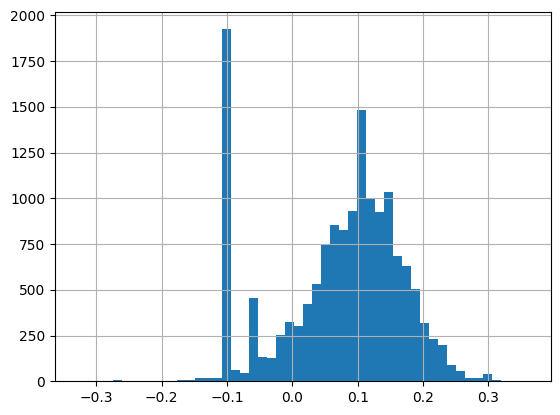

In [ ]:
sentiment_score_train.hist(bins=50)

In [ ]:
train_mean = sentiment_score_train.mean()
train_mean

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.07240374511239776

In [ ]:
y_pred = X_test.apply(lambda x: sentiment(x)) > train_mean

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, normalize='true')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.71684211, 0.28315789],
       [0.10652742, 0.89347258]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

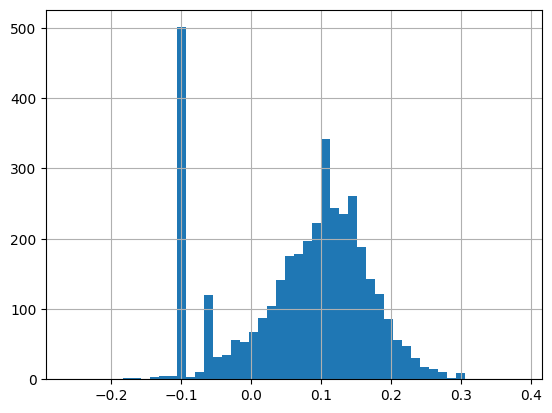

In [ ]:
sentiment_score_test = X_test.apply(lambda x: sentiment(x))
sentiment_score_test.hist(bins=50)

## Sentiment Based Recommendation System

In [ ]:
# Extract country more accurately from the Hotel_Address by considering the last 1 or 2 words
df['Country_Extracted'] = df['Hotel_Address'].apply(lambda x: x.split()[-1] if x.split()[-2] in ['Kingdom', 'States'] else x.split()[-1])
df['Country_Extracted'] = df['Country_Extracted'].replace('Kingdom', 'United Kingdom')

df['Country_Extracted'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


United Kingdom    7290
Netherlands       4700
France            2498
Austria           2092
Italy             1392
Spain             1100
Name: Country_Extracted, dtype: int64

### Final Recommendations

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Extract city or area from hotel addresses
df['City'] = df['Hotel_Address'].apply(lambda x: x.split()[-2] if x.endswith(('United Kingdom', 'Netherlands', 'France', 'Austria', 'Italy', 'Spain')) else 'Unknown')

# Provide recommendations based on selected city and minimum score threshold
def recommend_hotels(city, min_score):
    # Filter hotels based on selected city
    filtered_hotels = df[df['City'] == city]

    # Filter positive hotels with average score above the minimum threshold
    positive_recommendations = filtered_hotels[(filtered_hotels['Sentiment'] == 'Positive') &
                                               (filtered_hotels['Average_Score'] >= min_score)]

    # Sort positive recommendations by average score
    sorted_positive_recommendations = positive_recommendations.sort_values(by='Average_Score', ascending=False)

    return sorted_positive_recommendations

# Function to display recommendations based on selected values
def display_recommendations(city, min_score):
    clear_output(wait=True)
    recommended_hotels = recommend_hotels(city, min_score)
    if not recommended_hotels.empty:
        recommended_hotel = recommended_hotels.iloc[0]
        print("Recommended Hotel:")
        print(f"Name: {recommended_hotel['Hotel_Name']}")
        print(f"Address: {recommended_hotel['Hotel_Address']}")
        print(f"Average Score: {recommended_hotel['Average_Score']}")
        print("Reason for Recommendation: This hotel has a high average score and positive sentiment based on customer reviews.")
    else:
        print("No recommendations found for the selected criteria.")

# Create a dropdown widget for city selection
city_dropdown = widgets.Dropdown(
    options=df['City'].unique(),
    description='City:'
)

# Create a slider widget for minimum score threshold
score_threshold_slider = widgets.FloatSlider(
    value=7.0,
    min=0.0,
    max=10.0,
    step=0.1,
    description='Rating:'
)

# Create an output widget for displaying recommendations
output = widgets.Output()

# Function to handle changes in dropdown and slider values
def handle_change(change):
    city = city_dropdown.value
    min_score = score_threshold_slider.value
    with output:
        display_recommendations(city, min_score)

# Attach the handle_change function to the dropdown and slider
city_dropdown.observe(handle_change, names='value')
score_threshold_slider.observe(handle_change, names='value')

# Display the widgets
display(city_dropdown)
display(score_threshold_slider)
display(output)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dropdown(description='City:', options=('Paris', 'United', 'Vienna', 'Barcelona', 'Amsterdam', 'Milan'), value=…

FloatSlider(value=7.0, description='Rating:', max=10.0)

Output()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming you want to filter hotels based on additional tags
# Create a list of unique tags from the 'Tags' column
unique_tags = df['Tags'].str.split(', ').explode().unique()

# Create a dropdown widget for selecting tags
tags_dropdown = widgets.Dropdown(
    options=unique_tags,
    description='Tags:'
)

# Function to filter hotels based on selected city, minimum score, and tags
def recommend_hotels(city, min_score, selected_tags):
    # Filter hotels based on selected city
    filtered_hotels = df[df['City'] == city]

    # Filter positive hotels with average score above the minimum threshold
    positive_recommendations = filtered_hotels[(filtered_hotels['Sentiment'] == 'Positive') &
                                               (filtered_hotels['Average_Score'] >= min_score)]

    # Filter hotels based on selected tags
    if selected_tags:
        positive_recommendations = positive_recommendations[positive_recommendations['Tags'].str.contains(selected_tags)]

    # Sort positive recommendations by average score
    sorted_positive_recommendations = positive_recommendations.sort_values(by='Average_Score', ascending=False)

    return sorted_positive_recommendations

# Function to display recommendations based on selected values
def display_recommendations(city, min_score, selected_tags):
    clear_output(wait=True)
    recommended_hotels = recommend_hotels(city, min_score, selected_tags)
    if not recommended_hotels.empty:
        recommended_hotel = recommended_hotels.iloc[0]
        print("Recommended Hotel:")
        print(f"Name: {recommended_hotel['Hotel_Name']}")
        print(f"Address: {recommended_hotel['Hotel_Address']}")
        print(f"Average Score: {recommended_hotel['Average_Score']}")
        print("Reason for Recommendation: This hotel has a high average score and positive sentiment based on customer reviews.")
    else:
        print("No recommendations found for the selected criteria.")

# Create a dropdown widget for city selection
city_dropdown = widgets.Dropdown(
    options=df['City'].unique(),
    description='City:'
)

# Create a slider widget for minimum score threshold
score_threshold_slider = widgets.FloatSlider(
    value=8.0,
    min=0.0,
    max=10.0,
    step=0.1,
    description='Min Score:'
)

# Create an output widget for displaying recommendations
output = widgets.Output()

# Function to handle changes in dropdown and slider values
def handle_change(change):
    city = city_dropdown.value
    min_score = score_threshold_slider.value
    selected_tags = tags_dropdown.value
    with output:
        display_recommendations(city, min_score, selected_tags)

# Attach the handle_change function to the dropdown and slider
city_dropdown.observe(handle_change, names='value')
score_threshold_slider.observe(handle_change, names='value')
tags_dropdown.observe(handle_change, names='value')

# Display the widgets
display(city_dropdown)
display(score_threshold_slider)
display(tags_dropdown)
display(output)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dropdown(description='City:', options=('Paris', 'United', 'Vienna', 'Barcelona', 'Amsterdam', 'Milan'), value=…

FloatSlider(value=8.0, description='Min Score:', max=10.0)

Dropdown(description='Tags:', options=("[' Leisure trip '", "' Couple '", "' Double or Twin Room '", "' Stayed…

Output()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming you want to recommend hotels to avoid (negative recommendations)

# Function to recommend hotels to avoid based on selected city, maximum score, and selected tags
def recommend_hotels_to_avoid(city, max_score, selected_tags):
    # Filter hotels based on selected city
    filtered_hotels = df[df['City'] == city]

    # Filter negative hotels with average score below the maximum threshold
    negative_recommendations = filtered_hotels[(filtered_hotels['Sentiment'] == 'Negative') &
                                               (filtered_hotels['Average_Score'] <= max_score)]

    # Filter hotels based on selected tags
    if selected_tags:
        negative_recommendations = negative_recommendations[negative_recommendations['Tags'].str.contains(selected_tags)]

    # Sort negative recommendations by average score
    sorted_negative_recommendations = negative_recommendations.sort_values(by='Average_Score', ascending=True)

    return sorted_negative_recommendations

# Function to display recommendations to avoid based on selected values
def display_recommendations_to_avoid(city, max_score, selected_tags):
    clear_output(wait=True)
    recommended_hotels_to_avoid = recommend_hotels_to_avoid(city, max_score, selected_tags)
    if not recommended_hotels_to_avoid.empty:
        recommended_hotel_to_avoid = recommended_hotels_to_avoid.iloc[0]
        print("Hotel to Avoid:")
        print(f"Name: {recommended_hotel_to_avoid['Hotel_Name']}")
        print(f"Address: {recommended_hotel_to_avoid['Hotel_Address']}")
        print(f"Average Score: {recommended_hotel_to_avoid['Average_Score']}")
        print("Reason for Avoidance: This hotel has a low average score and negative sentiment based on customer reviews.")
    else:
        print("No hotels to avoid found for the selected criteria.")

# Create a dropdown widget for city selection
city_dropdown_to_avoid = widgets.Dropdown(
    options=df['City'].unique(),
    description='City:'
)

# Create a slider widget for maximum score threshold
score_threshold_slider_to_avoid = widgets.FloatSlider(
    value=6.0,
    min=0.0,
    max=10.0,
    step=0.1,
    description='Max Score:'
)

# Create an output widget for displaying recommendations to avoid
output_to_avoid = widgets.Output()

# Function to handle changes in dropdown and slider values for hotels to avoid
def handle_change_to_avoid(change):
    city_to_avoid = city_dropdown_to_avoid.value
    max_score_to_avoid = score_threshold_slider_to_avoid.value
    selected_tags_to_avoid = tags_dropdown.value
    with output_to_avoid:
        display_recommendations_to_avoid(city_to_avoid, max_score_to_avoid, selected_tags_to_avoid)

# Attach the handle_change function to the dropdown and slider for hotels to avoid
city_dropdown_to_avoid.observe(handle_change_to_avoid, names='value')
score_threshold_slider_to_avoid.observe(handle_change_to_avoid, names='value')
tags_dropdown.observe(handle_change_to_avoid, names='value')

# Display the widgets for hotels to avoid
display(city_dropdown_to_avoid)
display(score_threshold_slider_to_avoid)
display(tags_dropdown)
display(output_to_avoid)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dropdown(description='City:', options=('Paris', 'United', 'Vienna', 'Barcelona', 'Amsterdam', 'Milan'), value=…

FloatSlider(value=6.0, description='Max Score:', max=10.0)

Dropdown(description='Tags:', index=4, options=("[' Leisure trip '", "' Couple '", "' Double or Twin Room '", …

Output()

References for creating recommendation systems :

Here are some relevant Stack Overflow references related to the concepts used in the code:

1. Extracting Substrings from Strings using `split` method:
   - [Splitting strings in Python with split() method](https://stackoverflow.com/questions/6181763/splitting-string-in-python-with-split-method)

2. Creating Dropdown Widgets with `ipywidgets`:
   - [Creating a dropdown menu widget in IPython](https://stackoverflow.com/questions/53305085/creating-a-dropdown-menu-widget-in-ipython)
   - [How to create a Dropdown Menu in Jupyter Notebook (Python)?](https://stackoverflow.com/questions/36313023/how-to-create-a-dropdown-menu-in-jupyter-notebook-python)

3. Creating Slider Widgets with `ipywidgets`:
   - [How to create a slider in Jupyter Notebook?](https://stackoverflow.com/questions/46458166/how-to-create-a-slider-in-jupyter-notebook)
   - [Creating a slider widget in IPython](https://stackoverflow.com/questions/57398462/creating-a-slider-widget-in-ipython)

4. Handling Widget Events:
   - [How to observe and update a variable through a widget?](https://stackoverflow.com/questions/57592906/how-to-observe-and-update-a-variable-through-a-widget)
   - [How to get a value from a dropdown widget in IPython notebook?](https://stackoverflow.com/questions/45516203/how-to-get-a-value-from-a-dropdown-widget-in-ipython-notebook)

5. Outputting Information using `IPython.display`:
   - [How to output variables in Jupyter Notebook](https://stackoverflow.com/questions/25378610/how-to-output-variables-in-jupyter-notebook)

These references cover various aspects of creating interactive widgets, handling events, and displaying output in Jupyter Notebooks using Python. You can explore these threads for more details and examples.

